## Linear Regression
___
by: _Oskar Edén Wallberg_

Implements two fundamental methods for linear regression <br>
Ordinary Least Squares (OLS) <br>
Gradient Descent (GD)

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from models.LinRegOLS import LinearRegressionOLS
from models.LinRegGD import LinearRegressionGD

sns.set_style('darkgrid')
print(f'pd=={pd.__version__}')
print(f'np=={np.__version__}')
print(f'sns=={sns.__version__}')

pd==2.1.1
np==1.26.0
sns==0.13.0


### Create sample data
___
* linear data 

`y = 3x + 45`

In [178]:
m_samples = 100
X = np.linspace(0, m_samples-1, m_samples).reshape(-1,1)
noise = 50*np.random.randn(m_samples)
w = 3
b = 45
x = X.ravel()
y = w * x + b + noise

X.shape, y.shape

((100, 1), (100,))

### Scale data
___
* Important for GD to avoid exploding or vanishing gradient problems.

In [179]:
def standardize(a: np.ndarray) -> np.ndarray: 
    u, s = np.mean(a), np.std(a)
    return (a-u)/s, u, s

# mean and std need to rescale b, w & y_pred to original scale. 
Xst, ux, sx = standardize(X)
yst, uy, sy = standardize(y)

Xst.shape, yst.shape

((100, 1), (100,))

### Visualize the dataset
___

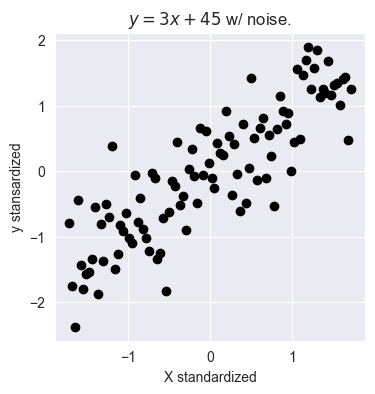

In [180]:
fig = plt.figure(figsize=(4,4))
ax: plt.Axes = plt.axes()
ax.scatter(Xst, yst, c='k')
ax.set_xlabel('X standardized')
ax.set_ylabel('y stansardized')
ax.set_title(rf'$y = {w}x + {b}$ w/ noise.')
plt.show()


### Ordinary least squares
___
Calc once:
* `X.T @ X @ B = X.T @ y`
* `B = np.inv(X.T @ X) @ (X.T @ y)`
* `b = B[0]` 
* `w = B[1:]`

In [181]:
linregOLS = LinearRegressionOLS()

linregOLS.fit(X=Xst, y=yst)

y_predOLS = linregOLS.predict(X=Xst)

y_predOLS.shape

(100,)

### Gradient descent
___
Iterate n times:
* `db = -2/N * np.sum(y-(X @ w + b))`
* `dw = -2/N * X.T @ (y-(X @ w + b))`
* `b = b - ɑ * db`
* `w = b - ɑ * dw`

In [182]:
linregGD = LinearRegressionGD()

linregGD.fit(X=Xst, y=yst)

y_predGD = linregGD.predict(X=Xst)

y_predGD.shape

(100,)

### Rescaling to orignal size
___
* y_orig = y_pred * σy + µy

* b_orig = b * σy + µy - w * µx * σy/σx

* w_orig = w * σy/σx

//note see README for derivation of b & w rescaling

In [183]:
rescale_y = lambda y_sc: np.round(y_sc * sy + uy, decimals=3)
rescale_b = lambda b, w: np.round(b * sy + uy - w * ux * sy/sx, decimals=3)
rescale_w = lambda w: np.round(w * sy/sx, decimals=3)

yOLS = rescale_y(y_sc=y_predOLS)
bOLS = rescale_b(b=linregOLS.b, w=linregOLS.w[0])
wOLS = rescale_w(w=linregOLS.w[0])

yGD = rescale_y(y_sc=y_predGD)
bGD = rescale_b(b=linregGD.b, w=linregGD.w[0])
wGD = rescale_w(w=linregGD.w[0])

yOLS.shape, yGD.shape

((100,), (100,))

In [184]:
# accuracy measurement for regression
def mean_square_error(y_true, y_pred, decimals:int=3) -> int:
    mse = np.mean(np.square(y_true-y_pred))
    return np.round(mse, decimals=decimals)

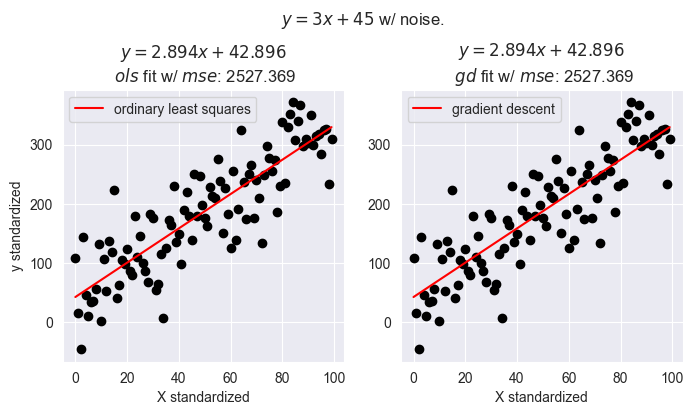

OLS - b: 42.896, w: 2.894
GD  - b: 42.896, w: 2.894


In [185]:
fig = plt.figure(figsize=(8,4))
fig.suptitle(rf'$y = {w}x + {b}$ w/ noise.')
fig.subplots_adjust(top=0.78, bottom=0.1)

ax1: plt.Axes = plt.axes(121)
ax1.scatter(X, y, c='k')
ax1.plot(X, yOLS, c='r', label='ordinary least squares')
ax1.set_xlabel('X standardized')
ax1.set_title(f'$y = {wOLS}x + {bOLS}$ \n $ols$ fit w/ $mse$: {mean_square_error(y_true=y, y_pred=yOLS)}')
ax1.legend()

ax2: plt.Axes = plt.axes(122)
ax2.scatter(X, y, c='k')
ax2.plot(X, yGD, c='r', label='gradient descent')
ax2.set_xlabel('X standardized')
ax2.set_title(f'$y = {wGD}x + {bGD}$ \n $gd$ fit w/ $mse$: {mean_square_error(y_true=y, y_pred=yGD)}')
ax2.legend()

ax1.set_ylabel('y standardized')

plt.show()

print(f'OLS - b: {bOLS}, w: {wOLS}')
print(f'GD  - b: {bGD}, w: {wGD}')